In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
##Data Cleaning & pre-processing

In [4]:
pd.options.display.max_rows = 100
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
pd.options.display.max_rows = 100
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#Drop column with high amount of missing value, high amounts of synthetics data will affected an optimal model

df= df_train.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1).copy()
df_target= df_test.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1).copy()


In [7]:
#Filling NaN and Null data with SimpleImputer in order to built an optimal model

In [8]:
import statistics
from sklearn.impute import SimpleImputer

In [9]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
median_imputer = SimpleImputer(missing_values = np.nan, strategy="median")
mf_imputer = SimpleImputer(missing_values = np.nan, strategy="most_frequent")

In [10]:
MasVnrType_imp = mf_imputer.fit(df[["MasVnrType"]])
df["MasVnrType"] = MasVnrType_imp.transform(df[["MasVnrType"]])

MasVnrArea_imp = mean_imputer.fit(df[["MasVnrArea"]])
df["MasVnrArea"] = MasVnrArea_imp.transform(df[["MasVnrArea"]])

BsmtQual_imp = mf_imputer.fit(df[["BsmtQual"]])
df["BsmtQual"] = BsmtQual_imp.transform(df[["BsmtQual"]])

BsmtCond_imp = mf_imputer.fit(df[["BsmtCond"]])
df["BsmtCond"] = BsmtCond_imp.transform(df[["BsmtCond"]])

BsmtExposure_imp = mf_imputer.fit(df[["BsmtExposure"]])
df["BsmtExposure"] = BsmtExposure_imp.transform(df[["BsmtExposure"]])

BsmtFinType1_imp = mf_imputer.fit(df[["BsmtFinType1"]])
df["BsmtFinType1"] = BsmtFinType1_imp.transform(df[["BsmtFinType1"]])

BsmtFinType2_imp = mf_imputer.fit(df[["BsmtFinType2"]])
df["BsmtFinType2"] = BsmtFinType2_imp.transform(df[["BsmtFinType2"]])

Electrical_imp = mf_imputer.fit(df[["Electrical"]])
df["Electrical"] = Electrical_imp.transform(df[["Electrical"]])

GarageType_imp = mf_imputer.fit(df[["GarageType"]])
df["GarageType"] = GarageType_imp.transform(df[["GarageType"]])

GarageYrBlt_imp = median_imputer.fit(df[["GarageYrBlt"]])
df["GarageYrBlt"] = GarageYrBlt_imp.transform(df[["GarageYrBlt"]])

GarageFinish_imp = mf_imputer.fit(df[["GarageFinish"]])
df["GarageFinish"] = GarageFinish_imp.transform(df[["GarageFinish"]])

GarageQual_imp = mf_imputer.fit(df[["GarageQual"]])
df["GarageQual"] = GarageQual_imp.transform(df[["GarageQual"]])

GarageCond_imp = mf_imputer.fit(df[["GarageCond"]])
df["GarageCond"] = GarageCond_imp.transform(df[["GarageCond"]])

In [11]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [12]:
df["GarageCond"].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [13]:
pd.options.display.max_rows = 10

In [14]:
MSZoning_imp = mf_imputer.fit(df_target[["MSZoning"]])
df_target["MSZoning"] = MSZoning_imp.transform(df_target[["MSZoning"]])

Utilities_imp = mf_imputer.fit(df_target[["Utilities"]])
df_target["Utilities"] = Utilities_imp.transform(df_target[["Utilities"]])

Exterior1st_imp = mf_imputer.fit(df_target[["Exterior1st"]])
df_target["Exterior1st"] = Exterior1st_imp.transform(df_target[["Exterior1st"]])

Exterior2nd_imp = mf_imputer.fit(df_target[["Exterior2nd"]])
df_target["Exterior2nd"] = Exterior2nd_imp.transform(df_target[["Exterior2nd"]])

MasVnrType_imp = mf_imputer.fit(df_target[["MasVnrType"]])
df_target["MasVnrType"] = MasVnrType_imp.transform(df_target[["MasVnrType"]])

MSZoning_imp = mf_imputer.fit(df_target[["MSZoning"]])
df_target["MSZoning"] = MSZoning_imp.transform(df_target[["MSZoning"]])

MasVnrArea_imp = mean_imputer.fit(df_target[["MasVnrArea"]])
df_target["MasVnrArea"] = MasVnrArea_imp.transform(df_target[["MasVnrArea"]])

BsmtQual_imp = mf_imputer.fit(df_target[["BsmtQual"]])
df_target["BsmtQual"] = BsmtQual_imp.transform(df_target[["BsmtQual"]])

BsmtCond_imp = mf_imputer.fit(df_target[["BsmtCond"]])
df_target["BsmtCond"] = BsmtCond_imp.transform(df_target[["BsmtCond"]])

BsmtExposure_imp = mf_imputer.fit(df_target[["BsmtExposure"]])
df_target["BsmtExposure"] = BsmtExposure_imp.transform(df_target[["BsmtExposure"]])

BsmtFinType1_imp = mf_imputer.fit(df_target[["BsmtFinType1"]])
df_target["BsmtFinType1"] = BsmtFinType1_imp.transform(df_target[["BsmtFinType1"]])

BsmtFinSF1_imp = mf_imputer.fit(df_target[["BsmtFinSF1"]])
df_target["BsmtFinSF1"] = BsmtFinSF1_imp.transform(df_target[["BsmtFinSF1"]])

BsmtFinType2_imp = mf_imputer.fit(df_target[["BsmtFinType2"]])
df_target["BsmtFinType2"] = BsmtFinType2_imp.transform(df_target[["BsmtFinType2"]])

BsmtFinSF2_imp = mf_imputer.fit(df_target[["BsmtFinSF2"]])
df_target["BsmtFinSF2"] = BsmtFinSF2_imp.transform(df_target[["BsmtFinSF2"]])

TotalBsmtSF_imp = median_imputer.fit(df_target[["TotalBsmtSF"]])
df_target["TotalBsmtSF"] = TotalBsmtSF_imp.transform(df_target[["TotalBsmtSF"]])

BsmtUnfSF_imp = median_imputer.fit(df_target[["BsmtUnfSF"]])
df_target["BsmtUnfSF"] = BsmtUnfSF_imp.transform(df_target[["BsmtUnfSF"]])

BsmtFullBath_imp = mf_imputer.fit(df_target[["BsmtFullBath"]])
df_target["BsmtFullBath"] = BsmtFullBath_imp.transform(df_target[["BsmtFullBath"]])

BsmtHalfBath_imp = mf_imputer.fit(df_target[["BsmtHalfBath"]])
df_target["BsmtHalfBath"] = BsmtHalfBath_imp.transform(df_target[["BsmtHalfBath"]])

KitchenQual_imp = mf_imputer.fit(df_target[["KitchenQual"]])
df_target["KitchenQual"] = KitchenQual_imp.transform(df_target[["KitchenQual"]])

Functional_imp = mf_imputer.fit(df_target[["Functional"]])
df_target["Functional"] = Functional_imp.transform(df_target[["Functional"]])

GarageType_imp = mf_imputer.fit(df_target[["GarageType"]])
df_target["GarageType"] = GarageType_imp.transform(df_target[["GarageType"]])

GarageYrBlt_imp = median_imputer.fit(df_target[["GarageYrBlt"]])
df_target["GarageYrBlt"] = GarageYrBlt_imp.transform(df_target[["GarageYrBlt"]])

GarageFinish_imp = mf_imputer.fit(df_target[["GarageFinish"]])
df_target["GarageFinish"] = GarageFinish_imp.transform(df_target[["GarageFinish"]])

GarageCars_imp = mf_imputer.fit(df_target[["GarageCars"]])
df_target["GarageCars"] = GarageCars_imp.transform(df_target[["GarageCars"]])

GarageArea_imp = median_imputer.fit(df_target[["GarageArea"]])
df_target["GarageArea"] = GarageArea_imp.transform(df_target[["GarageArea"]])

GarageQual_imp = mf_imputer.fit(df_target[["GarageQual"]])
df_target["GarageQual"] = GarageQual_imp.transform(df_target[["GarageQual"]])

GarageCond_imp = mf_imputer.fit(df_target[["GarageCond"]])
df_target["GarageCond"] = GarageCond_imp.transform(df_target[["GarageCond"]])

SaleType_imp = mf_imputer.fit(df_target[["SaleType"]])
df_target["SaleType"] = SaleType_imp.transform(df_target[["SaleType"]])

In [15]:
df_target.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [16]:
df_target["SaleType"].unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD'],
      dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [19]:
#Make Sure Column on df and df_target have same dtypes
df_target["BsmtFullBath"] = df_target["BsmtFullBath"].astype(int)
df_target["BsmtHalfBath"] = df_target["BsmtHalfBath"].astype(int)

In [20]:
# ObjectTypesData = MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition

In [21]:
train=df.copy()
test=df_target.copy()

In [22]:
#Use LabelEncoder to Object Dtypes
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [23]:
for col in train.columns:
    if train[col].dtype == 'object':
        label_encoder.fit(train[col])  # Fit encoder pada data df_train[col]
        train[col] = label_encoder.transform(train[col])  # Melakukan encoding pada df_train[col]
        test[col] = label_encoder.transform(test[col])  # Melakukan encoding yang sama pada df_test[col]


In [24]:
#Exploratory Data Analysis

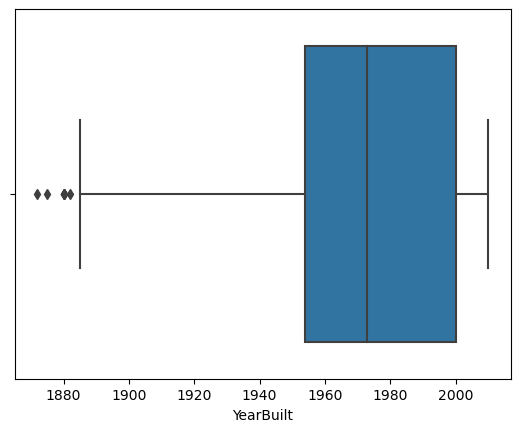

In [25]:
sns.boxplot(data=train, x="YearBuilt")

# Menampilkan plot
plt.show()

# below 1880 is outlier

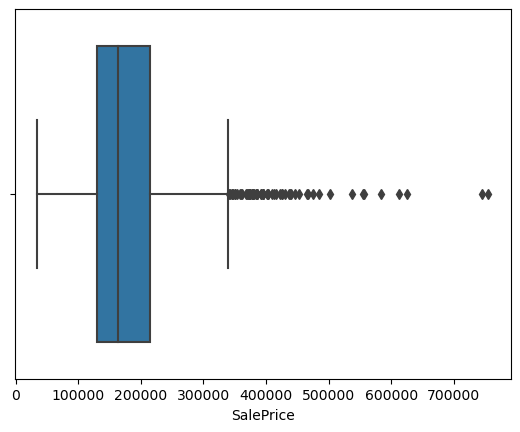

In [26]:
sns.boxplot(data=train, x="SalePrice")

# Menampilkan plot
plt.show()

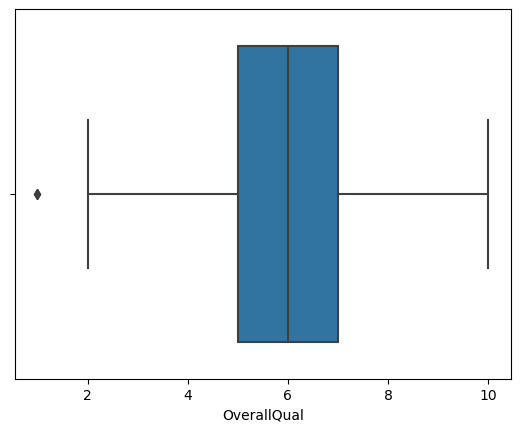

In [27]:
sns.boxplot(data=train, x="OverallQual")

# Menampilkan plot
plt.show()

#below 2 have outlier

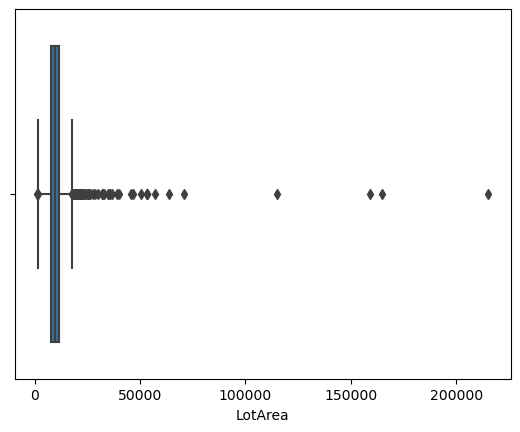

In [28]:
sns.boxplot(data=train, x="LotArea")

# Menampilkan plot
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

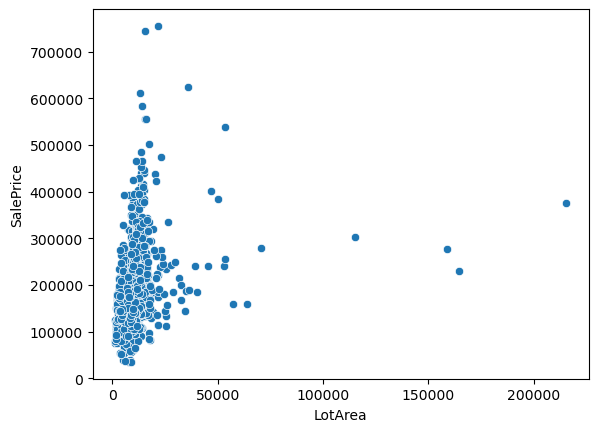

In [29]:
sns.scatterplot(data=train,
               x="LotArea",
               y="SalePrice")

In [30]:
##Remove Outlier
train.drop(train[train["SalePrice"] > 670000].index, axis=0, inplace=True)
train.drop(train[train["YearBuilt"] < 1900].index, axis=0, inplace=True)
train.drop(train[train["OverallQual"]<4].index,inplace=True)
train.drop(train[train["MSSubClass"]>150].index,inplace=True)


In [31]:
##########################################################################################

In [32]:
#Machine Learning Modeling
X=train.iloc[:,1:-1]
y=train["SalePrice"].values

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=140,test_size=0.1)

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()  # Membuat objek RandomForestRegressor
model_rf = rf.fit(X_train, y_train)  # Melatih model dengan data X_train dan y_train
y_pred = model_rf.predict(X_test)  # Melakukan prediksi dengan data X_test


In [35]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_pred,y_test))

0.0943006371891259


In [36]:
#Comparation testing model on y_test and y_prediction
y_prediction = pd.DataFrame({"y_pred":y_pred,
                            "y_test":y_test})
print(y_prediction)

        y_pred  y_test
0    344369.38  402000
1    113493.12  129000
2    137777.85  147000
3    188827.82  214500
4    454521.90  582933
..         ...     ...
127  131336.50  136500
128  226667.13  239000
129  129959.32  124000
130  322830.13  313000
131  145088.76  142500

[132 rows x 2 columns]


In [37]:
#Deployong Models on TEST dataset

In [38]:
X_test=test.drop(["Id"],axis=1)

In [39]:
y_test_deploy = model_rf.predict(X_test)

In [40]:
submission = pd.DataFrame({"Id":test["Id"],
                     "SalePrice":y_test_deploy})
print(submission)

        Id  SalePrice
0     1461  123228.49
1     1462  155105.32
2     1463  184578.82
3     1464  184650.82
4     1465  199890.25
...    ...        ...
1454  2915  113965.50
1455  2916  117349.00
1456  2917  152692.16
1457  2918  121240.10
1458  2919  229632.52

[1459 rows x 2 columns]


In [41]:
submission.to_csv("submission.csv",index=False)